In [2]:
import tensorflow as tf
import numpy as np

data = np.loadtxt('./alphabets/A_Z Handwritten Data.csv', delimiter=',', dtype=np.float32)

In [3]:
print(len(data))

import matplotlib.pyplot as plt

# plt.imshow(sample[1:].reshape(28,28), cmap='gray')
# plt.show()

dataset = []
label = []
def generate_data():
    start = 0
    for i in range(start, len(data)):
        sample = data[i]
        label.append(sample[0])
        dataset.append(sample[1:].reshape(28,28))        
            

generate_data()


372451


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=42, shuffle=True)
len(X_train), len(X_test), len(y_train), len(y_test)

import numpy as np
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

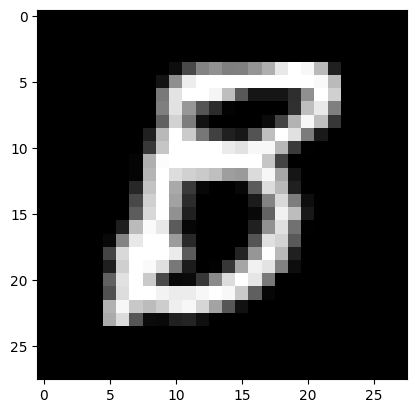

In [46]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(-1, 28, 28,1)
X_test = X_test.reshape(-1, 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
input_shape = (-1, 28, 28, 1)


model = tf.keras.Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape[1:]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
2328/2328 [==============================] - 230s 98ms/step - loss: 0.3090 - accuracy: 0.9300
Epoch 2/3
2328/2328 [==============================] - 225s 97ms/step - loss: 0.0940 - accuracy: 0.9732
Epoch 3/3
2328/2328 [==============================] - 226s 97ms/step - loss: 0.0750 - accuracy: 0.9784


In [47]:
X_test = np.array(X_test).reshape(-1, 28, 28, 1)
y_test = np.array(y_test)
(x , y) = model.evaluate(X_test, y_test)
model.save('Alphabets.model')


2328/2328 [==============================] - 17s 7ms/step - loss: 0.0493 - accuracy: 0.9866
INFO:tensorflow:Assets written to: Alphabets.model\assets


INFO:tensorflow:Assets written to: Alphabets.model\assets


1/1 [==============================] - 0s 33ms/step
Prediction:  N Actual:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


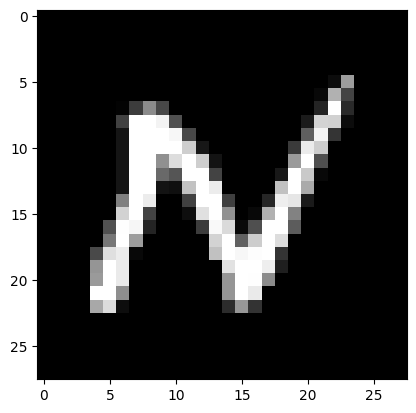

1/1 [==============================] - 0s 31ms/step
Prediction:  S Actual:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0.]


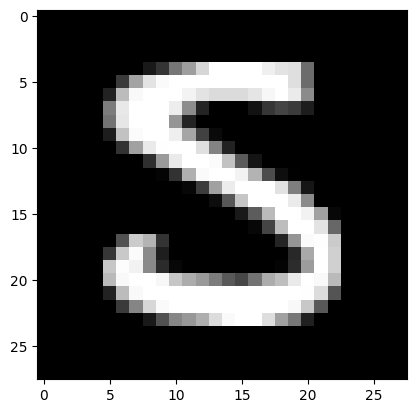

1/1 [==============================] - 0s 32ms/step
Prediction:  C Actual:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


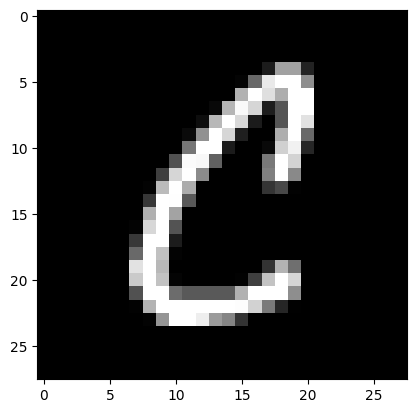

1/1 [==============================] - 0s 36ms/step
Prediction:  M Actual:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


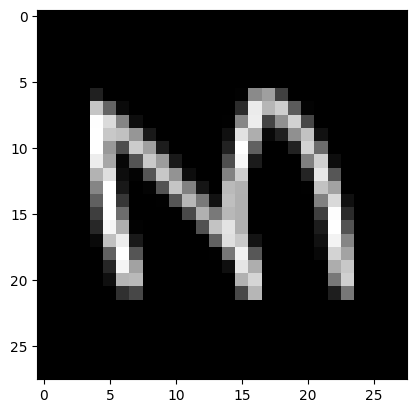

1/1 [==============================] - 0s 25ms/step
Prediction:  A Actual:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


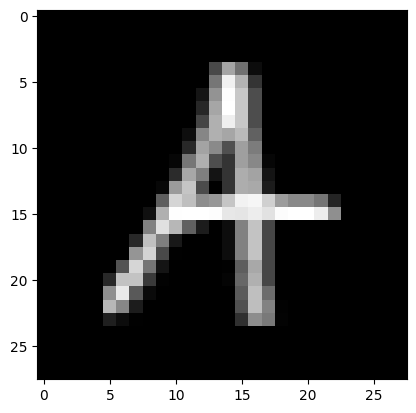

1/1 [==============================] - 0s 29ms/step
Prediction:  P Actual:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


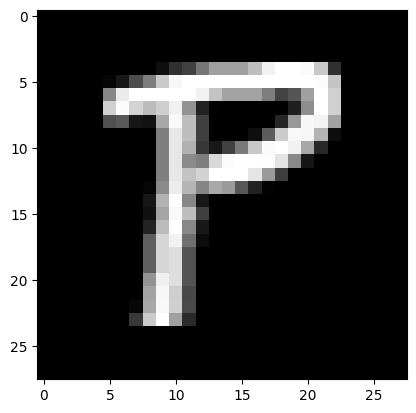

1/1 [==============================] - 0s 25ms/step
Prediction:  O Actual:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


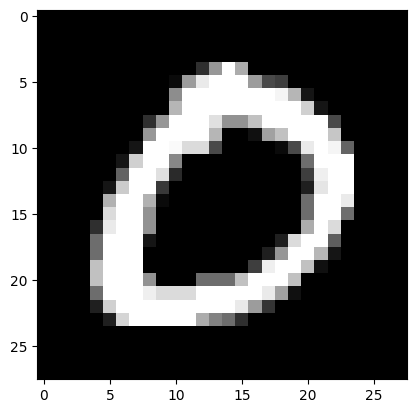

1/1 [==============================] - 0s 37ms/step
Prediction:  C Actual:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


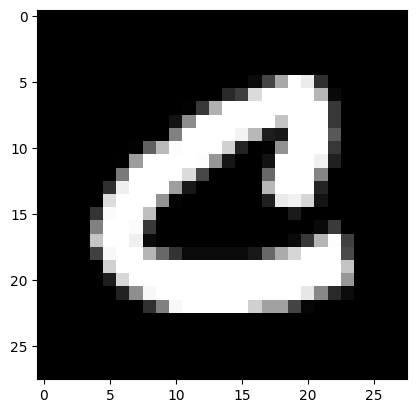

1/1 [==============================] - 0s 26ms/step
Prediction:  T Actual:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0.]


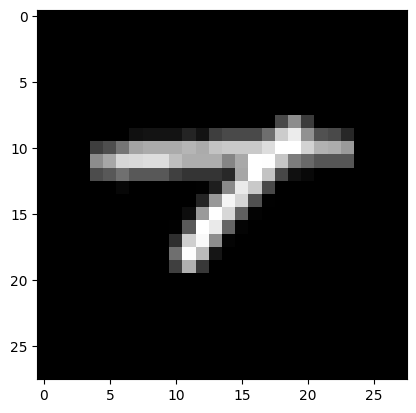

1/1 [==============================] - 0s 23ms/step
Prediction:  W Actual:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0.]


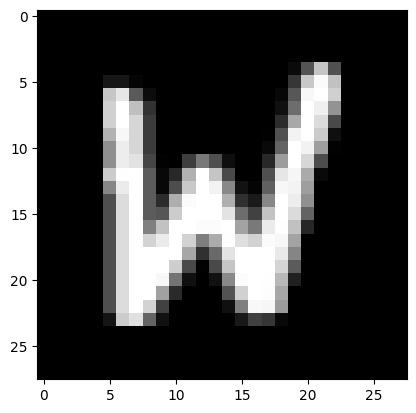

In [29]:
import random
alphabets = {"1": "A", "2": "B", "3": "C", "4": "D", "5": "E", "6": "F", "7": "G", "8": "H", "9": "I", "10": "J", "11": "K", "12": "L", "13": "M", "14": "N", "15": "O", "16": "P", "17": "Q", "18": "R", "19": "S", "20": "T", "21": "U", "22": "V", "23": "W", "24": "X", "25": "Y", "26": "Z"}
for i in range(10):
    randi = random.randint(0, len(X_test))
    prediction = model.predict(X_test[i].reshape(1,28,28,1))
    prediction = np.argmax(prediction) + 1
    prediction = alphabets[str(prediction)]
    print("Prediction: ", prediction, "Actual: ", y_test[i])
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.show()    
    


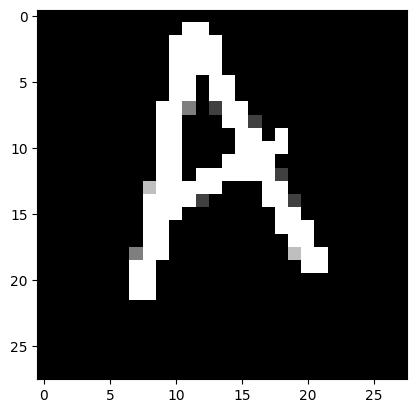

1/1 [==============================] - 0s 165ms/step


'A'

In [48]:
model = tf.keras.models.load_model('Alphabets.model')

import cv2

def predict_img():
    img = cv2.imread('morse.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = img.reshape(1, 28, 28, 1)
    img = np.array(img)
    prediction = model.predict(img)
    prediction = np.argmax(prediction) + 1
    prediction = alphabets[str(prediction)]
    return prediction

def plot_img():
    img = cv2.imread('morse.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.show()

plot_img()
predict_img()